# *CAPSTONE PROJECT- ANALYZING THE SEVERITY OF CAR ACCIDENTS*

## Introduction/Business Understanding

Life is so busy in this 21st century and we all are often in fast-track!! Everybody rushes and always want to reach their destination in no time!! This hurry sometimes can be life threatening as accidents might happen. Now-a-days,  road accidents are very common and most of the times they lead to loss of property, injuries and can even cause death. So, wouldn’t it be great to try to understand the most common causes, in order to prevent them from happening?

In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations. Besides this, weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads. In order to understand these common factors that are causing accidents and the correlation between them, I am attempting to analyze the data from City of Seattle’s police department showing all the collisions from 2004 till present. 

In an effort to reduce the frequency of car collisions, an algorithm must be developed to predict the severity of an accident given the current weather, road and visibility conditions. 

The target audience of the project is local Seattle government, police, rescue groups, and last but not least, car insurance institutes. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents in the city. 

## Data Understanding

Data set from the Seattle Police Department has 37 independent variables with 194,673 records collected since 2004 to present. As the main objective of this project is to analyze the severity of the accidents, our dependent/target variable will be 'SEVERITYCODE' and the attributes we will be using to measure the severity of accidents are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'. Our target variable 'SEVERITYCODE' consists of numbers 1 & 2 with 1 being only 'Property Damage Only Collision' and 2 is 'injury collision'.

The ample amount of data collected from past 15 years can definitely be used for the analysis of the severity of accidents only after pre-processing or cleaning the Data. That is, in the collected dataset there are many irrelevant attributes that are not necessary for our analysis and can be dropped out from the data set.  

In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [3]:
!wget -O Data-Collision.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-23 21:51:08--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collision.csv’

Data-Collision.csv  100%[===================>]  70.49M  18.7MB/s    in 3.9s    

2020-09-23 21:51:13 (17.9 MB/s) - ‘Data-Collision.csv’ saved [73917638/73917638]



In [4]:
df=pd.read_csv('Data-Collision.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [51]:
df.shape

(194673, 38)

## Data Pre-Processing:

As we are clear with our target variable and the variables that can be used to measure severity, we can now proceed with Data pre-processing step or cleaning the data. 

The dataset in the original form is not ready for data analysis. In order to prepare the data, first, we need to drop the irrelevant columns. In addition, most of the features are of object data types that need to be converted into numerical data types.  Also, we can see that dataset has many null values that has to be expelled from the dataset.  
Once, data is processed, then we can go ahead using the dataset for our analysis and to build model to prevent future accidents or to reduce severity. 

In [52]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

#### Dropping below columns as they are not required for our analysis. Although SPEEDING is a very important factor for the analysis of severity of collision, I am proceeding with dropping that as well because only around 9000 entries are recorded and the rest 184000 records are kept blank.

In [53]:
df.drop(['EXCEPTRSNCODE','EXCEPTRSNDESC','SPEEDING', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS','INTKEY',
         'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
         'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY', 
         'HITPARKEDCAR','ADDRTYPE','COLLISIONTYPE'],
         axis=1, inplace=True)

#### To find out how many fields have missing data

In [54]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64



#### Dropping unknown values from the columns

In [55]:
df=df[df['ROADCOND'] != 'Unknown']
df=df[df['LIGHTCOND']!= 'Unknown']
df=df[df['WEATHER'] != 'Unknown']

#### Replacing blanks with NaN and dropping those as well

In [56]:
nan_value = float("NaN") 
df. replace("", nan_value, inplace=True)
df. dropna(subset = ["LOCATION","WEATHER","ROADCOND","LIGHTCOND",], inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169186 entries, 0 to 194672
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    169186 non-null  int64 
 1   LOCATION        169186 non-null  object
 2   SEVERITYCODE.1  169186 non-null  int64 
 3   SEVERITYDESC    169186 non-null  object
 4   WEATHER         169186 non-null  object
 5   ROADCOND        169186 non-null  object
 6   LIGHTCOND       169186 non-null  object
dtypes: int64(2), object(5)
memory usage: 10.3+ MB


In [58]:
df['SEVERITYCODE'].value_counts()

1    113556
2     55630
Name: SEVERITYCODE, dtype: int64

#### Now that the data is unbalanced we have to balance by downsampling

In [59]:
from sklearn.utils import resample
df_1 = df[df.SEVERITYCODE==1]
df_2 = df[df.SEVERITYCODE==2]

df_1_dsample = resample(df_1, replace= False, n_samples= 55630, random_state=100)

balanced_df= pd.concat([df_1_dsample, df_2])
balanced_df.SEVERITYCODE.value_counts()

2    55630
1    55630
Name: SEVERITYCODE, dtype: int64

#### Now our data is balanced and is ready for analysis

## METHODOLOGY

For implementing the solution, I have used Github as a repository and running Jupyter Notebook to preprocess data and build Machine Learning models. Regarding coding, I have used Python and its popular packages such as Pandas, NumPy and Sklearn.
I have selected the most important features to predict the severity of accidents in Seattle. Among all the features, the following features have the most influence in the accuracy of the predictions:
“WEATHER”,
“ROADCOND”,
“LIGHTCOND”
Also, as I mentioned earlier, “SEVERITYCODE” is the target variable.

## DATA VISUALIZATION

#### So, as the data is ready, let us understand the data patterns or trends more clearly by data visualization method.

#### BAR GRAPH BASED ON WEATHER CONDITIONS:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

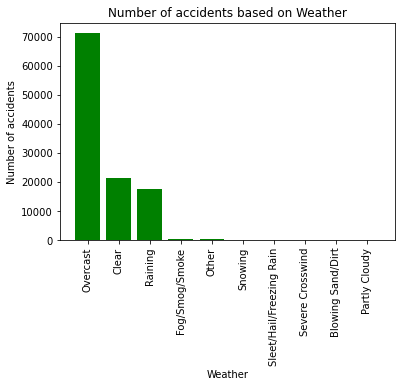

In [60]:
X=balanced_df.WEATHER.unique()
data=balanced_df.WEATHER.value_counts()
plt.bar(X, height=data, color='green')
plt.xlabel('Weather')
plt.ylabel('Number of accidents')
plt.title('Number of accidents based on Weather')
plt.xticks(rotation = 90)

#### From the above bar graph, it is clearly understood that the number of accidents are high during overcast and lesser number of accidents during clear and raining weather conditions. Accidents during all the other weather conditions are very negligible. 

#### BAR GRAPH BASED ON ROAD CONDITIONS:

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

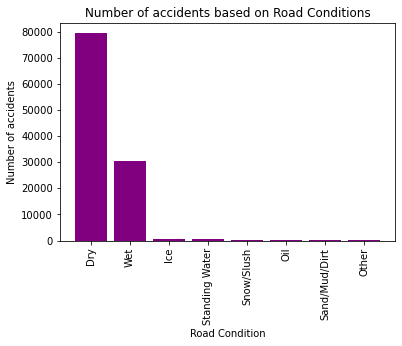

In [61]:
X=balanced_df.ROADCOND.unique()
data=balanced_df.ROADCOND.value_counts()
plt.bar(X, height=data, color='purple')
plt.xlabel('Road Condition')
plt.ylabel('Number of accidents')
plt.title('Number of accidents based on Road Conditions')
plt.xticks(rotation = 90)

#### From the above bar graph, it is clearly understood that the number of accidents are high during dry condition and almost reduced by half during wet road condition. Accidents during all the other road conditions are very negligible. 

#### BAR GRAPH BASED ON LIGHT CONDITIONS:

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

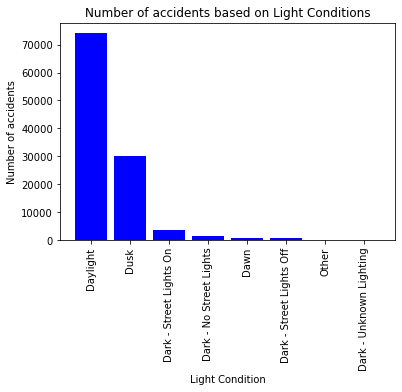

In [62]:
X=balanced_df.LIGHTCOND.unique()
data=balanced_df.LIGHTCOND.value_counts()
plt.bar(X, height=data, color='BLUE')
plt.xlabel('Light Condition')
plt.ylabel('Number of accidents')
plt.title('Number of accidents based on Light Conditions')
plt.xticks(rotation = 90)

#### From the above bar graph, it is clearly understood that the number of accidents are high during daylight and lesser during dusk light condition. Accidents during all the other light conditions are very negligible. 

#### As now we have understood the data, let's proceed with our analysis by applying machine learning models now. For that, let us convert our object data types to int data types.

In [18]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111260 entries, 22555 to 194671
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    111260 non-null  int64 
 1   LOCATION        111260 non-null  object
 2   SEVERITYCODE.1  111260 non-null  int64 
 3   SEVERITYDESC    111260 non-null  object
 4   WEATHER         111260 non-null  object
 5   ROADCOND        111260 non-null  object
 6   LIGHTCOND       111260 non-null  object
dtypes: int64(2), object(5)
memory usage: 6.8+ MB


#### Converting object type to int type

In [77]:
WEATHER = {'Blowing Sand/Dirt': 1, 'Clear': 2, 'Other': 3, 'Overcast': 4, 'Raining':5, 'Snowing': 6, 'Fog/Smog/Smoke': 7, 
           'Sleet/Hail/Freezing Rain': 8,'Severe Crosswind': 9, 'Partly Cloudy': 10}
balanced_df.WEATHER=[WEATHER[item] for item in balanced_df.WEATHER]

In [78]:
ROADCOND = {'Dry': 1, 'Oil': 2, 'Wet': 3, 'Ice': 4, 'Other': 5, 'Snow/Slush': 6, 'Sand/Mud/Dirt': 7, 'Standing Water': 8}
balanced_df.ROADCOND=[ROADCOND[item] for item in balanced_df.ROADCOND]

In [79]:
LIGHTCOND = {'Dark - No Street Lights': 1, 'Dark - Street Lights Off': 2, 'Dark - Street Lights On': 3, 'Dark - Unknown Lighting': 4, 
            'Dawn':5, 'Dusk': 6, 'Daylight': 7,'Other': 8}
balanced_df.LIGHTCOND=[LIGHTCOND[item] for item in balanced_df.LIGHTCOND]

In [80]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111260 entries, 22555 to 194671
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    111260 non-null  int64 
 1   LOCATION        111260 non-null  object
 2   SEVERITYCODE.1  111260 non-null  int64 
 3   SEVERITYDESC    111260 non-null  object
 4   WEATHER         111260 non-null  int64 
 5   ROADCOND        111260 non-null  int64 
 6   LIGHTCOND       111260 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 11.8+ MB


## MODELING AND EVALUATION

#### Let us proceed with building machine learning models for evaluating the data set. 

#### DATA NORMALIZATION

#### Let's define x and y

In [81]:
x=np.asarray(balanced_df[['WEATHER','ROADCOND','LIGHTCOND']])
x[0:5]

array([[4, 1, 7],
       [2, 1, 7],
       [2, 3, 7],
       [2, 1, 7],
       [5, 3, 7]])

In [24]:
y=np.asarray(balanced_df['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 1, 1])

#### Normalize the data set

In [89]:
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.82254307, -0.61044261,  0.66564029],
       [-0.72095207, -0.61044261,  0.66564029],
       [-0.72095207,  1.43198435,  0.66564029],
       [-0.72095207, -0.61044261,  0.66564029],
       [ 1.59429064,  1.43198435,  0.66564029]])

#### Train/Test Split

#### Let us split our data for training purpose and also for the testing.

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (89008, 3) (89008,)
Test set: (22252, 3) (22252,)


In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [94]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 1, 1, 2, 1])

#### Prediction by KNN 

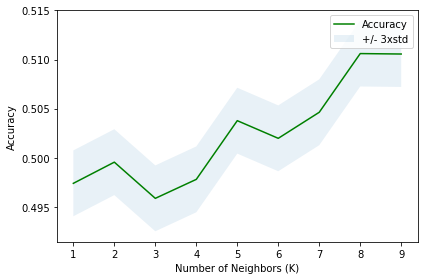

In [91]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [28]:
# The best value of k is 8
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat = neigh.predict(x_test)
yhat[0:5]

array([2, 1, 2, 1, 2])

In [29]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted'))

KNN Jaccard index: 0.52
KNN F1-score: 0.50


#### Prediction by SVM

In [ ]:
from sklearn import svm
clf = svm.SVR(gamma='auto') # or gamma='scale'
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
yhat1 = clf.predict(x_test)
yhat1[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [97]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat1, average='weighted')

0.4989546358110909

In [98]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat1)

0.5189870573431602

In [85]:
print("Jaccard score: %.2f" % jaccard_similarity_score(y_test, yhat1))
print("F1-score: %.2f" % f1_score(y_test, yhat1, average='weighted'))

Jaccard score: 0.52
F1-score: 0.48


#### Prediction by Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree.fit(x_train,y_train)
predTree = LoanTree.predict(x_test)
print("DecisionTrees's Accuracy:", metrics.accuracy_score(y_test, predTree))
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat1))
print("DT F1-score: %.2f" % f1_score(y_test, yhat1, average='weighted'))

DecisionTrees's Accuracy: 0.5216909341482413
DT Jaccard index: 0.52
DT F1-score: 0.48


#### Prediction by Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
yhat_lr = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LR.score(x_test, y_test)))
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_lr))
print("LR F1-score: %.2f" % f1_score(y_test, yhat_lr, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))

Accuracy of logistic regression classifier on test set: 0.52
LR Jaccard index: 0.52
LR F1-score: 0.50
LR LogLoss: 0.69


## RESULTS

### Report of the accuracy of the built model using different evaluation metrics: 

|Algorithm|Jaccard|F1 Score|Log Loss|
|---------|-------|--------|--------|
|KNN      |  0.52 |  0.50  |    NA  |
|SVM      |  0.52 |  0.48  |    NA  |
|Decision Tree|  0.52 |  0.48 |    NA  |
|Logistic Regression|  0.52 |  0.50 |  0.69 |

## DISCUSSION:

In this analysis, our main objective was to analyze the severity of car accidents based on weather conditions, road conditions, and many other factors. Even though our data was of good size, there were number of missing elements and we needed to clean the data in order to get a good result. We had to drop many columns and unfortunately the column ‘SPEEDING’ because of too many missing entries and it was one of the important factors that should have been considered for the analysis of severity of accidents and to increase the efficiency of the machine learning models. 

From the analysis, it is clear that most accidents are caused during overcast, in the daylight with dry/wet roads and are minor in nature. This could be helpful to the police department in understanding where to install more stop signs or speed bumps to avoid speeding specially during turns to overcome bad road conditions, installing street lights at regular distances to overcome bad light conditions. 

Based on the above report obtained KNN could be the best model to proceed with predicting severity of car accidents.

## CONCLUSION:

Although this analysis has given us some good insights, a much closer inspection would have been required to understand the impact of other important variables. From the above analysis it is clearly understood that accidents occuring are minor and the public can be alerted with the above accident causing conditions and accidents can be avoided with precautionary measures. Also as the accidents involved considerable amount of loss of property or injuries, our findings can be helpful to the Seattle Police Department in enforcing some new measures to prevent future accidents.